# Model Selection

Model selection is the task of selecting a statistical model from a set of candidate models, given data. In the simplest cases, a pre-existing set of data is considered. 

However, the task can also involve the design of experiments such that the data collected is well-suited to the problem of model selection. 
<br> Given candidate models of similar predictive or explanatory power, the `simplest` model is most likely to be the best choice.<br> Once we have selected our `models` and made `predictions` on test data, we can then use various `evaluation` metrics to ascertain which model performs the best on the our data.

We will now select `three` different models and futher `process` our data by training our selected models using our data. 

We begin this process by importing all of the necessary packages and making other predetermined settings. 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=2)

Then we read in the `dataset` that was processed in the `Preprocessing and Data Exploration` notebook.
<br> You can view this dataset directly by clicking the link [here](https://raw.githubusercontent.com/JordanVencel/DFProject/main/Processed_Data.csv)

In [2]:
base_df = pd.read_csv("https://raw.githubusercontent.com/JordanVencel/DFProject/main/Processed_Data.csv")
base_df = base_df[['row_id', 'tweet', 'sentiment_type', 'sentiment_score']]

labeled_df = base_df

We then perform another intermeditate `cleaning` and `resetting` of class label datatypes. 

In [3]:
def categorise(row):
      if row['sentiment_score'] > .05:
        return 'Positive'
      elif row['sentiment_score'] < -.05:
        return 'Negative'
      else:
        return 'Neutral'

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)


    
labeled_df['tweet'] = labeled_df['tweet'].apply(lambda x: cleaning_numbers(x))
labeled_df['tweet'].tail()

labeled_df = base_df
labeled_df['class_label'] = labeled_df.apply(lambda row: categorise(row), axis=1)
display(labeled_df)

,row_id,tweet,sentiment_type,sentiment_score,class_label
0,1,i have six of them still live at home being h...,compound,-0.4767,Negative
1,2,then go for your dozen kids you are just missi...,compound,-0.2960,Negative
2,3,about buying a country you could turn it in...,compound,0.5267,Positive
3,4,actual receipts and yet you havent asked anyon...,compound,0.4404,Positive
4,5,tesla wall battery for the save power went out...,compound,0.2732,Positive
...,...,...,...,...,...
7353,7354,elon musk liked a tweet from whole mars catalo...,compound,0.4215,Positive
7354,7355,dude only said he is buying twitter to sell b...,compound,-0.0516,Negative
7355,7356,give me your tesla,compound,0.0000,Neutral
7356,7357,chick fil a should definitely go public they s...,compound,0.6908,Positive


## Naive Bayes Classifier for Sentiment Analysis of Tesla Tweets
Naive Bayes is one of the simplest classification algorithms for large chunks of data.<br> It is used in various applications such as spam filtering, text classification, sentiment analysis, and recommendation systems.<br> It uses the Bayes probability theorem for `unknown class prediction`.

The use of Bayes’ theorem with a `strong independence assumption` between the features is the basis for naive Bayes classification. When used for textual data analysis, such as Natural Language Processing, the Naive Bayes classification `yields good results`.

First, we must perform a `training` and `testing split` on our data. 
We do this by using sklearn's train_test_split package.

In [4]:
nb_df = pd.DataFrame(labeled_df['tweet'], columns=['tweet'])
nb_df['class_label'] = labeled_df[['class_label']]
display(nb_df)

x, x_test, y, y_test = train_test_split(nb_df['tweet'], nb_df['class_label'], test_size = 0.1, random_state=26105111)

,tweet,class_label
0,i have six of them still live at home being h...,Negative
1,then go for your dozen kids you are just missi...,Negative
2,about buying a country you could turn it in...,Positive
3,actual receipts and yet you havent asked anyon...,Positive
4,tesla wall battery for the save power went out...,Positive
...,...,...
7353,elon musk liked a tweet from whole mars catalo...,Positive
7354,dude only said he is buying twitter to sell b...,Negative
7355,give me your tesla,Neutral
7356,chick fil a should definitely go public they s...,Positive


We use the `useless` words defined in our `data exploration` notebook to create a `list` of stop words. 
<br>These `stop words` will be passed through nltk's `CountVectorizer`, which we will then `fit` to the training data. 
<br>Once the `vectorizer` has been `fitted`, we can `transform` our testing `data`. 

In [5]:
stop_words = ['the', 'to', 'a', 'and', 'of', 'is', 'in', 'you', 'i', 'for']
vec = CountVectorizer(stop_words=stop_words)
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

We can then instantiate a `Multinomial Naive Bayes` model and `fit` our testing `data` to it. 

In [6]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

We can then make `predictions` on our testing split. 

In [7]:
predictions = model.predict(vec.transform(nb_df['tweet']))
nb_df['prediction'] = predictions
display(nb_df)

,tweet,class_label,prediction
0,i have six of them still live at home being h...,Negative,Negative
1,then go for your dozen kids you are just missi...,Negative,Negative
2,about buying a country you could turn it in...,Positive,Positive
3,actual receipts and yet you havent asked anyon...,Positive,Positive
4,tesla wall battery for the save power went out...,Positive,Positive
...,...,...,...
7353,elon musk liked a tweet from whole mars catalo...,Positive,Positive
7354,dude only said he is buying twitter to sell b...,Negative,Negative
7355,give me your tesla,Neutral,Positive
7356,chick fil a should definitely go public they s...,Positive,Positive


We use sklearn's `metrics packages` to view our evaluation metrics.

{'Negative': {'precision': 0.8609769189479335, 'recall': 0.8158697863682605, 'f1-score': 0.8378166623139202, 'support': 1966}, 'Neutral': {'precision': 0.942461762563729, 'recall': 0.5935779816513761, 'f1-score': 0.728398536448072, 'support': 2180}, 'Positive': {'precision': 0.7430858806404658, 'recall': 0.9536114570361146, 'f1-score': 0.8352877011180802, 'support': 3212}, 'accuracy': 0.8101386246262572, 'macro avg': {'precision': 0.8488415207173761, 'recall': 0.7876864083519171, 'f1-score': 0.8005009666266908, 'support': 7358}, 'weighted avg': {'precision': 0.8336557642916204, 'recall': 0.8101386246262572, 'f1-score': 0.8042947082844846, 'support': 7358}}


<AxesSubplot:>

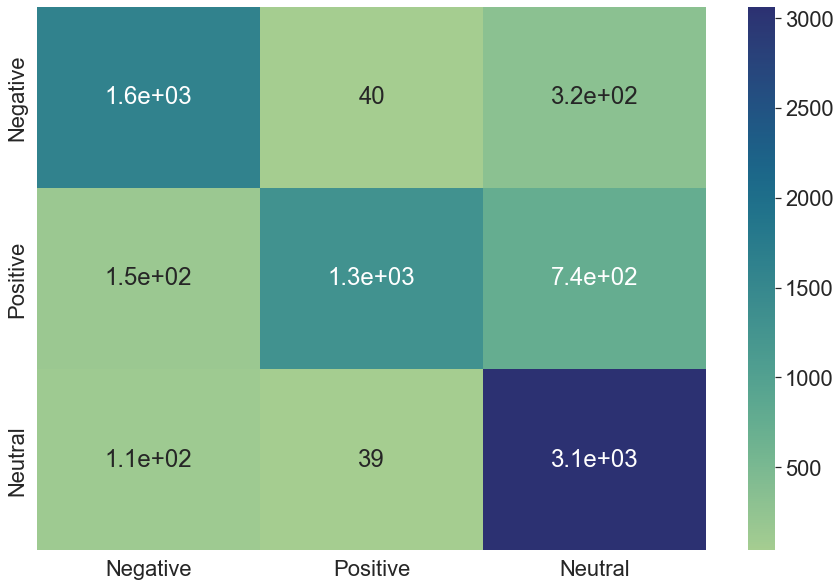

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

nb_classification_report = classification_report(nb_df['class_label'], nb_df['prediction'], output_dict=True)
print(nb_classification_report)

cf_matrix = confusion_matrix(nb_df['class_label'], nb_df['prediction'])
df_cm = pd.DataFrame(cf_matrix, index = [i for i in ['Negative', 'Positive', 'Neutral']], columns=[i for i in ['Negative', 'Positive', 'Neutral']])
sns.heatmap(df_cm, annot=True, cmap="crest")

## K Nearest Neighbors (KNN) Classifier for Sentiment Analysis of Tesla Tweets
The `k-nearest neighbors` algorithm, also known as `KNN` or `k-NN`, is a non-parametric, `supervised` learning classifier, which uses `proximity` to make classifications or predictions about the grouping of an individual data point.
<br> While it can be used for either `regression` or `classification` problems, it is typically used as a `classification` algorithm, working off the `assumption` that similar points can be found `near one another`.

In order to make this model work for our data, we must represent our tweets in a `numerical` format. 
<br>Thankfully, we can use sklearn's `TfidfVectorizer` package to do this. 
<br>It `converts` a collection of raw documents to a `matrix` of TF-IDF features.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(labeled_df.tweet, labeled_df.class_label, test_size = 0.1, random_state=26105111)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

nn_clf = KNeighborsClassifier(n_neighbors=40, metric='minkowski', weights='distance')
nn_clf.fit(X_train, y_train)

y_pred = nn_clf.predict(X_test)

knn_classification_report = classification_report(y_test, y_pred, output_dict=True)
print(knn_classification_report)

{'Negative': {'precision': 0.6043956043956044, 'recall': 0.2972972972972973, 'f1-score': 0.3985507246376812, 'support': 185}, 'Neutral': {'precision': 0.46613545816733065, 'recall': 0.5707317073170731, 'f1-score': 0.5131578947368421, 'support': 205}, 'Positive': {'precision': 0.6116751269035533, 'recall': 0.6965317919075145, 'f1-score': 0.6513513513513514, 'support': 346}, 'accuracy': 0.561141304347826, 'macro avg': {'precision': 0.5607353964888294, 'recall': 0.5215202655072949, 'f1-score': 0.5210199902419582, 'support': 736}, 'weighted avg': {'precision': 0.5693078120191835, 'recall': 0.561141304347826, 'f1-score': 0.5493163315850424, 'support': 736}}


<AxesSubplot:>

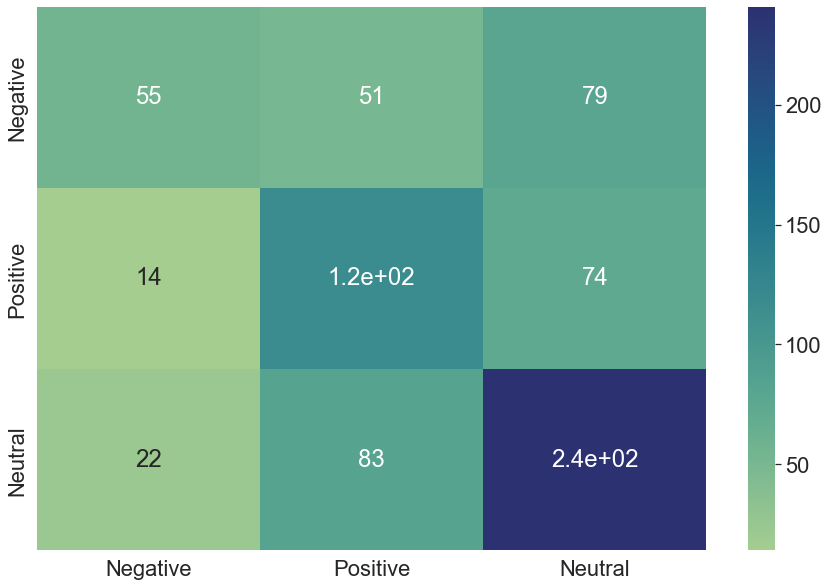

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in ['Negative', 'Positive', 'Neutral']], columns=[i for i in ['Negative', 'Positive', 'Neutral']])
sns.heatmap(df_cm, annot=True, cmap='crest')

## Multinomial Logistic Regression for Sentiment Analysis of Tesla Tweets
Multinomial logistic regression (often just called '`multinomial regression`') is used to predict a `nominal` dependent variable given `one or more` independent variables. It is sometimes considered an `extension` of binomial logistic regression to allow for a `dependent` variable with more than two `categories`. As with other types of `regression`, multinomial logistic regression can have `nominal and/or continuous` independent variables and can have `interactions` between independent variables to `predict` the dependent `variable`.

This model allows us to `predict` based on multiple classes, `not` just for `binary` classification.

Since a tweet can be `positive`, `negative`, or `neutral`, Multinomial Logistic Regression will be effective in modeling this dataset.  
Similar to KNN, MLR is a rather simple classification and follows Occam’s Razor. `Multinomial Logistic Regression` assumes that the data is case specific which means that each variable has as single value for each case.
<br> This is true for our use case since a tweet or a word can only be one sentiment. 


In [11]:
from sklearn.linear_model import LogisticRegression

Create a training and testing `split`.
<br>hen, `transform` the tweet data using the sklearn's `TfidfVectorizer`.
<br>`Fit` the data to the initialized `LogisticRegression` model.  

In [12]:
x, x_test, y, y_test = train_test_split(labeled_df.tweet, labeled_df.class_label, test_size=0.10, random_state=26105111)
multinomial_df = pd.DataFrame(x_test)
multinomial_df['class_label'] = y_test
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x)

x = vectoriser.transform(x)
x_test = vectoriser.transform(x_test)

logistic_regression = LogisticRegression(C=2, max_iter=1000, n_jobs=-1, multi_class='multinomial')
logistic_regression.fit(x, y)

LogisticRegression(C=2, max_iter=1000, multi_class='multinomial', n_jobs=-1)

Make a `prediction` using the testing data. 

In [13]:
predictions = logistic_regression.predict(x_test)
multinomial_df['predictions'] = predictions
multinomial_df

,tweet,class_label,predictions
5072,so promised million taxis by without any p...,Positive,Positive
1555,though the current population is aging,Neutral,Neutral
2116,thick fecker that onetesla an italian he was a...,Positive,Negative
5056,wait till all those motors blow up,Neutral,Neutral
7347,relax but look at it this way how else would h...,Positive,Negative
...,...,...,...
3399,i thought nl and it right,Neutral,Neutral
5793,the billionaire cofounder of tesla inc will ne...,Negative,Positive
929,more people didnt take profits than you know ...,Negative,Positive
6531,tax the tesla too lol,Positive,Positive


{'Negative': {'precision': 0.6466165413533834, 'recall': 0.4648648648648649, 'f1-score': 0.5408805031446541, 'support': 185}, 'Neutral': {'precision': 0.7288135593220338, 'recall': 0.6292682926829268, 'f1-score': 0.675392670157068, 'support': 205}, 'Positive': {'precision': 0.6948356807511737, 'recall': 0.8554913294797688, 'f1-score': 0.7668393782383419, 'support': 346}, 'accuracy': 0.6942934782608695, 'macro avg': {'precision': 0.6900885938088637, 'recall': 0.6498748290091868, 'f1-score': 0.6610375171800214, 'support': 736}, 'weighted avg': {'precision': 0.6921793279229606, 'recall': 0.6942934782608695, 'f1-score': 0.6845717599652531, 'support': 736}}


<AxesSubplot:>

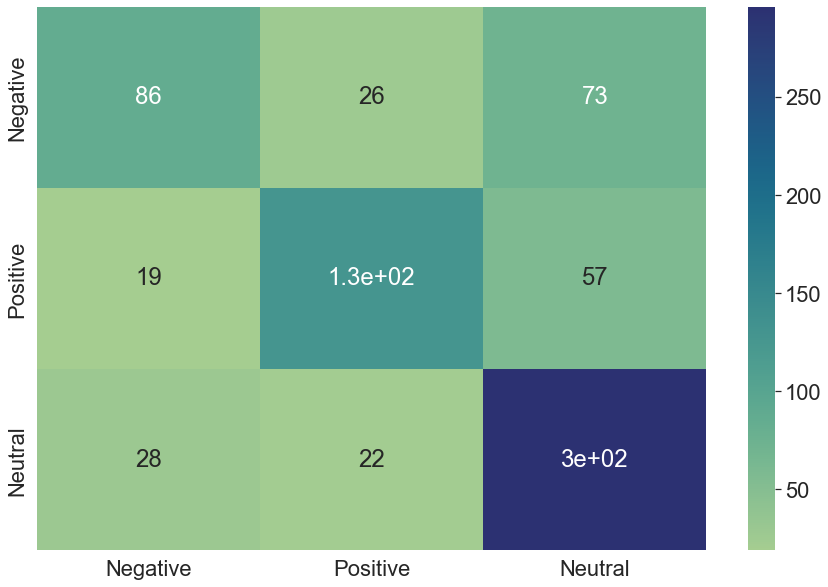

In [14]:
multinomial_classification_report = classification_report(multinomial_df['class_label'], multinomial_df['predictions'], output_dict=True)
print(multinomial_classification_report)

cf_matrix = confusion_matrix(multinomial_df['class_label'], multinomial_df['predictions'])
df_cm = pd.DataFrame(cf_matrix, index = [i for i in ['Negative', 'Positive', 'Neutral']], columns=[i for i in ['Negative', 'Positive', 'Neutral']])
sns.heatmap(df_cm, annot=True, cmap="crest")

# Evaluation of Models

In [15]:
label_list = ['Naive Bayes', 'KNN', "Multinomial LR"]

## Precision

In [16]:
negative_precision_list = []
negative_precision_list.append([nb_classification_report['Negative']['precision']])
negative_precision_list.append([knn_classification_report['Negative']['precision']])
negative_precision_list.append([multinomial_classification_report['Negative']['precision']])

neutral_precision_list = []
neutral_precision_list.append([nb_classification_report['Neutral']['precision']])
neutral_precision_list.append([knn_classification_report['Neutral']['precision']])
neutral_precision_list.append([multinomial_classification_report['Neutral']['precision']])

positive_precision_list = []
positive_precision_list.append([nb_classification_report['Positive']['precision']])
positive_precision_list.append([knn_classification_report['Positive']['precision']])
positive_precision_list.append([multinomial_classification_report['Positive']['precision']])

[Text(0.5, 1.0, 'Precision Scores - Negative Classifications')]

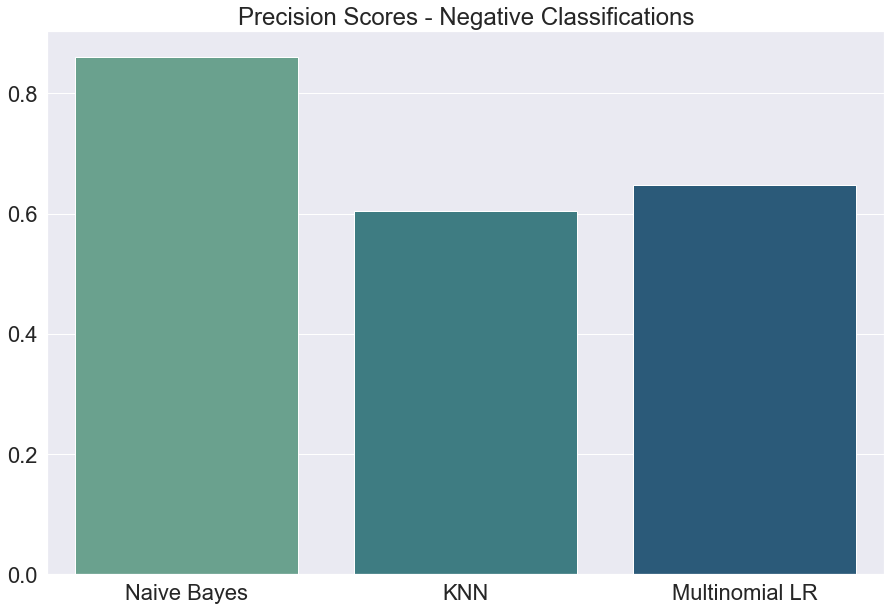

In [17]:
negative_precision_df = pd.DataFrame(negative_precision_list)
negative_precision_df = negative_precision_df.T
negative_precision_df.columns = label_list
sns.barplot(negative_precision_df, palette="crest", errorbar=None).set(title='Precision Scores - Negative Classifications')

[Text(0.5, 1.0, 'Precision Scores - Neutral Classifications')]

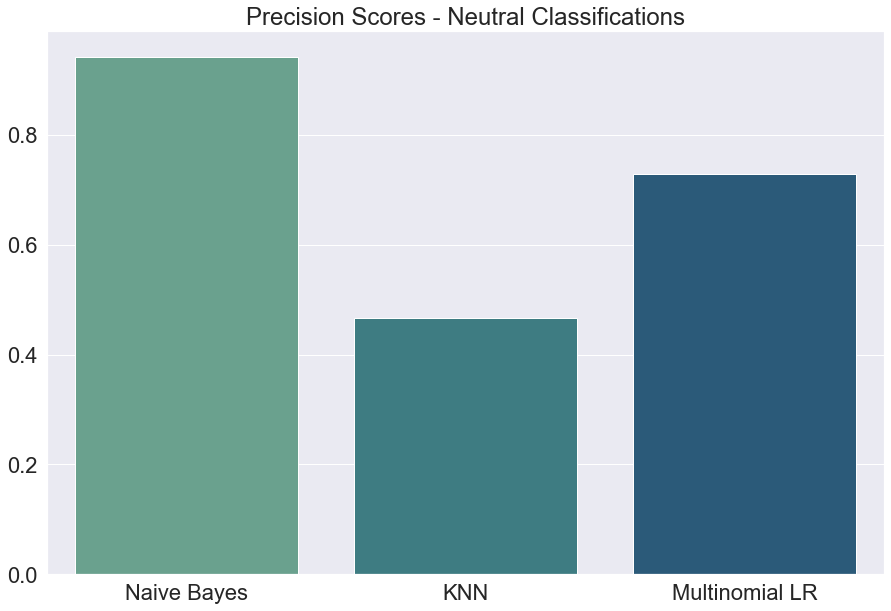

In [18]:
neutral_precision_df = pd.DataFrame(neutral_precision_list)
neutral_precision_df = neutral_precision_df.T
neutral_precision_df.columns = label_list
sns.barplot(neutral_precision_df, palette="crest", errorbar=None).set(title='Precision Scores - Neutral Classifications')

[Text(0.5, 1.0, 'Precision Scores - Positive Classifications')]

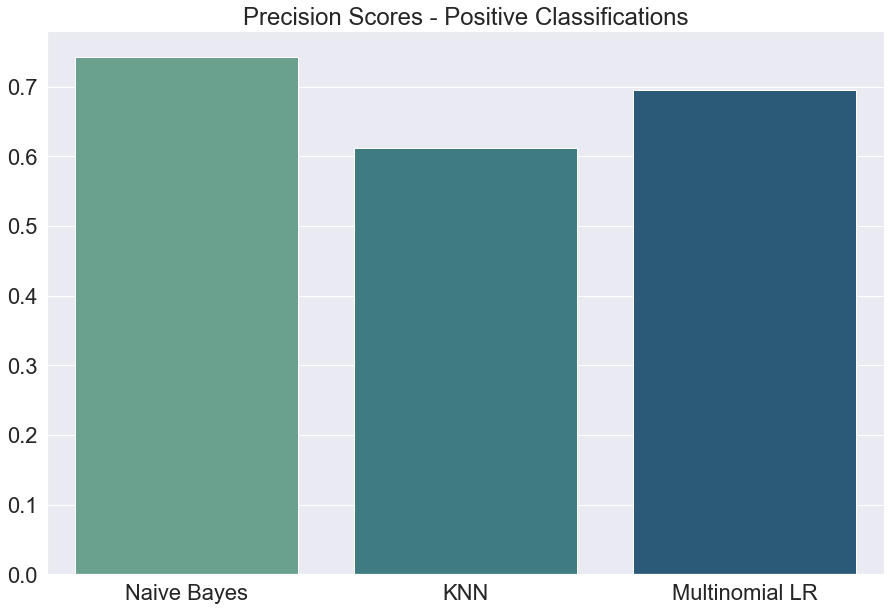

In [19]:
positive_precision_df = pd.DataFrame(positive_precision_list)
positive_precision_df = positive_precision_df.T
positive_precision_df.columns = label_list
sns.barplot(positive_precision_df, palette="crest", errorbar=None).set(title='Precision Scores - Positive Classifications')

## Recall

In [20]:
negative_recall_list = []
negative_recall_list.append(nb_classification_report['Negative']['recall'])
negative_recall_list.append(knn_classification_report['Negative']['recall'])
negative_recall_list.append(multinomial_classification_report['Negative']['recall'])

neutral_recall_list = []
neutral_recall_list.append(nb_classification_report['Neutral']['recall'])
neutral_recall_list.append(knn_classification_report['Neutral']['recall'])
neutral_recall_list.append(multinomial_classification_report['Neutral']['recall'])

positive_recall_list = []
positive_recall_list.append(nb_classification_report['Positive']['recall'])
positive_recall_list.append(knn_classification_report['Positive']['recall'])
positive_recall_list.append(multinomial_classification_report['Positive']['recall'])

[Text(0.5, 1.0, 'Recall Scores - Negative Classifications')]

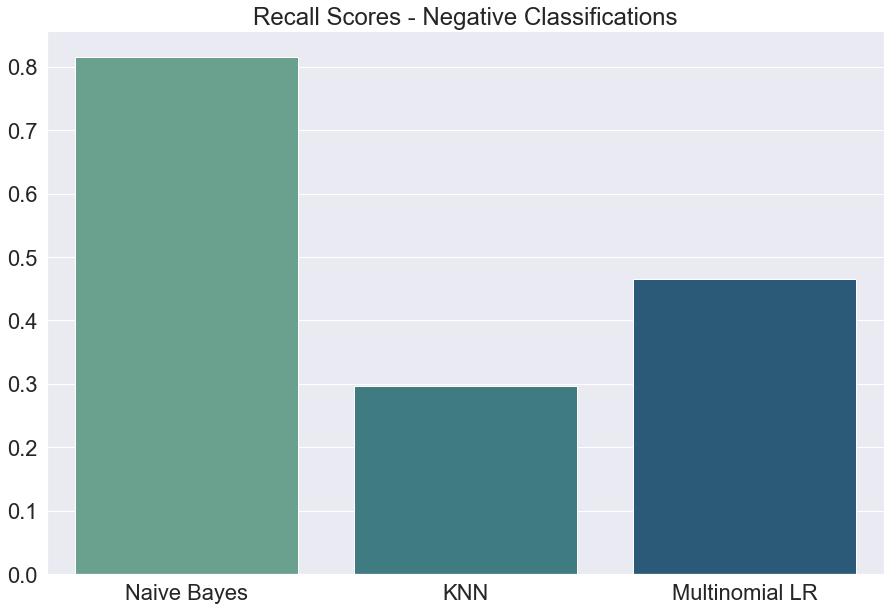

In [21]:
negative_recall_df = pd.DataFrame(negative_recall_list)
negative_recall_df = negative_recall_df.T
negative_recall_df.columns = label_list
sns.barplot(negative_recall_df, palette="crest", errorbar=None).set(title='Recall Scores - Negative Classifications')

[Text(0.5, 1.0, 'Recall Scores - Neutral Classifications')]

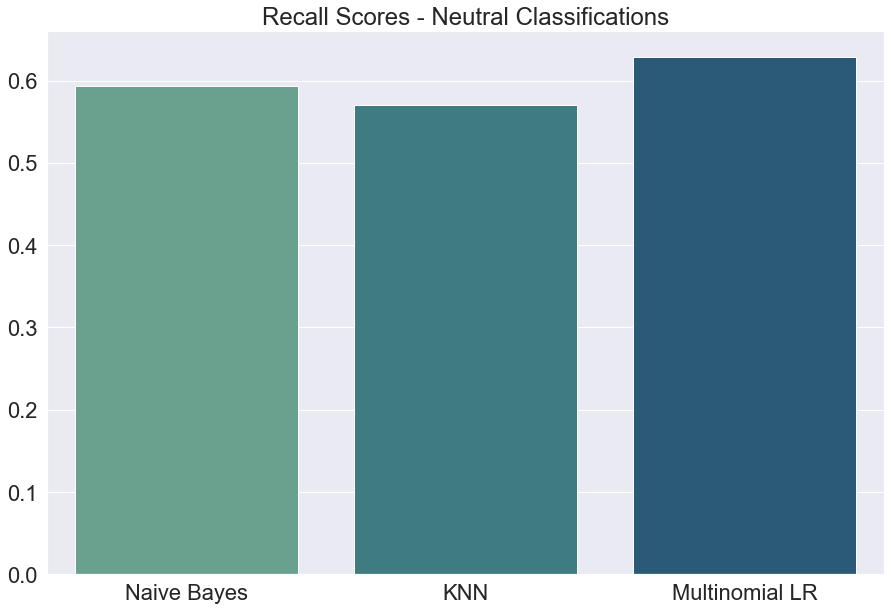

In [22]:
neutral_recall_df = pd.DataFrame(neutral_recall_list)
neutral_recall_df = neutral_recall_df.T
neutral_recall_df.columns = label_list
sns.barplot(neutral_recall_df, palette="crest", errorbar=None).set(title='Recall Scores - Neutral Classifications')

[Text(0.5, 1.0, 'Recall Scores - Positive Classifications')]

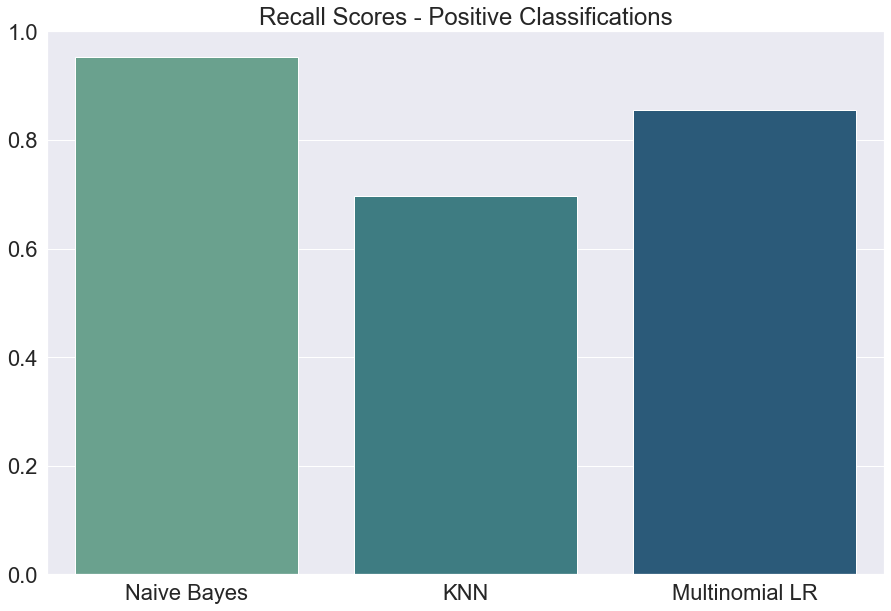

In [23]:
positive_recall_df = pd.DataFrame(positive_recall_list)
positive_recall_df = positive_recall_df.T
positive_recall_df.columns = label_list
sns.barplot(positive_recall_df, palette="crest", errorbar=None).set(title='Recall Scores - Positive Classifications')

## F1 Score

In [24]:
negative_f1_list = []
negative_f1_list.append(nb_classification_report['Negative']['f1-score'])
negative_f1_list.append(knn_classification_report['Negative']['f1-score'])
negative_f1_list.append(multinomial_classification_report['Negative']['f1-score'])

neutral_f1_list = []
neutral_f1_list.append(nb_classification_report['Neutral']['f1-score'])
neutral_f1_list.append(knn_classification_report['Neutral']['f1-score'])
neutral_f1_list.append(multinomial_classification_report['Neutral']['f1-score'])

positive_f1_list = []
positive_f1_list.append(nb_classification_report['Positive']['f1-score'])
positive_f1_list.append(knn_classification_report['Positive']['f1-score'])
positive_f1_list.append(multinomial_classification_report['Positive']['f1-score'])

[Text(0.5, 1.0, 'F1 Scores - Negative Classifications')]

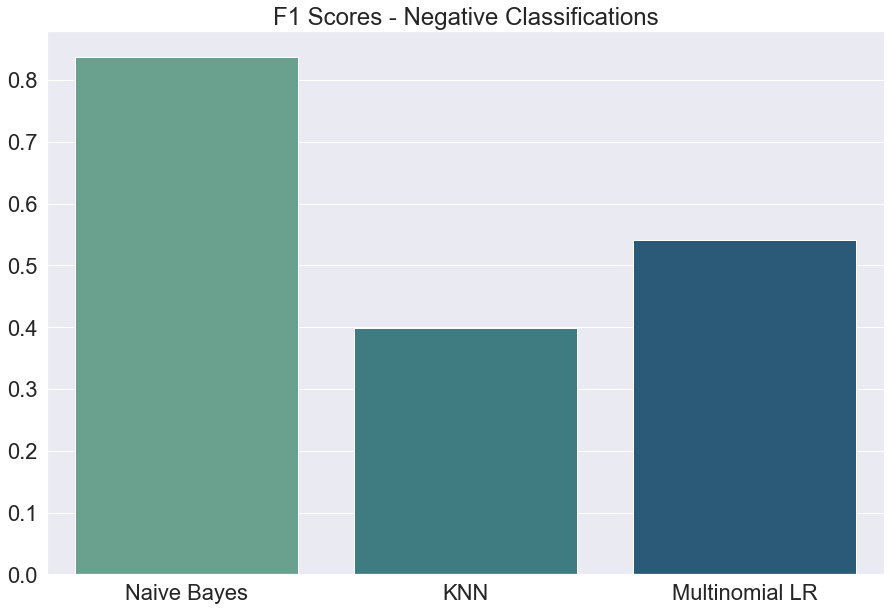

In [25]:
negative_f1_df = pd.DataFrame(negative_f1_list)
negative_f1_df = negative_f1_df.T
negative_f1_df.columns = label_list
sns.barplot(negative_f1_df, palette="crest", errorbar=None).set(title='F1 Scores - Negative Classifications')

[Text(0.5, 1.0, 'F1 Scores - Neutral Classifications')]

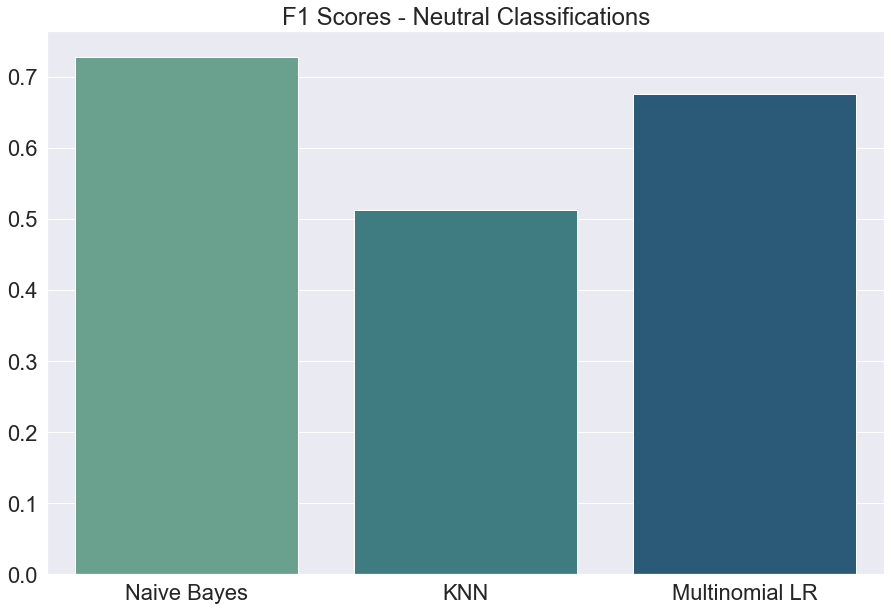

In [26]:
neutral_f1_df = pd.DataFrame(neutral_f1_list)
neutral_f1_df = neutral_f1_df.T
neutral_f1_df.columns = label_list
sns.barplot(neutral_f1_df, palette="crest", errorbar=None).set(title='F1 Scores - Neutral Classifications')

[Text(0.5, 1.0, 'F1 Scores - Positive Classifications')]

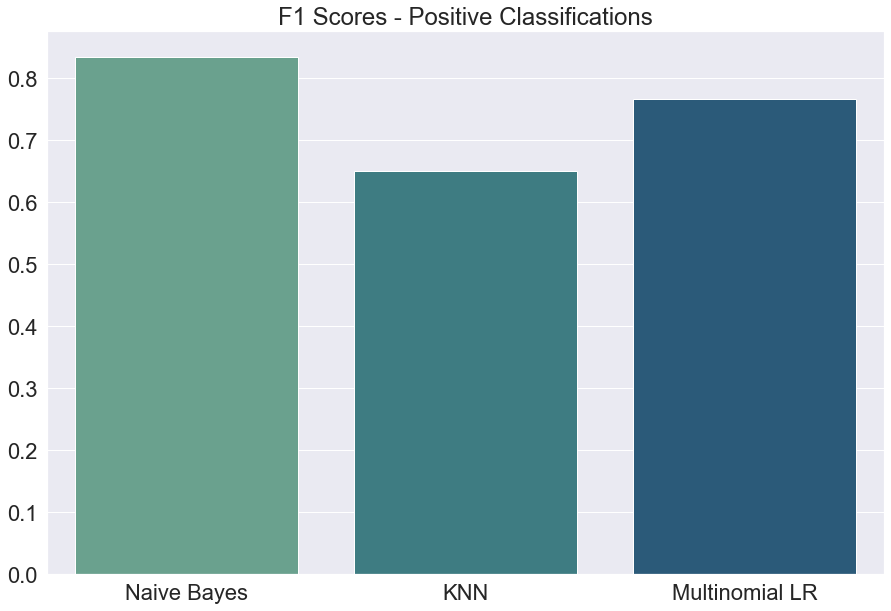

In [27]:
positive_f1_df = pd.DataFrame(positive_f1_list)
positive_f1_df = positive_f1_df.T
positive_f1_df.columns = label_list
sns.barplot(positive_f1_df, palette="crest", errorbar=None).set(title='F1 Scores - Positive Classifications')

[Text(0.5, 1.0, 'Average F1 Scores for Each Model')]

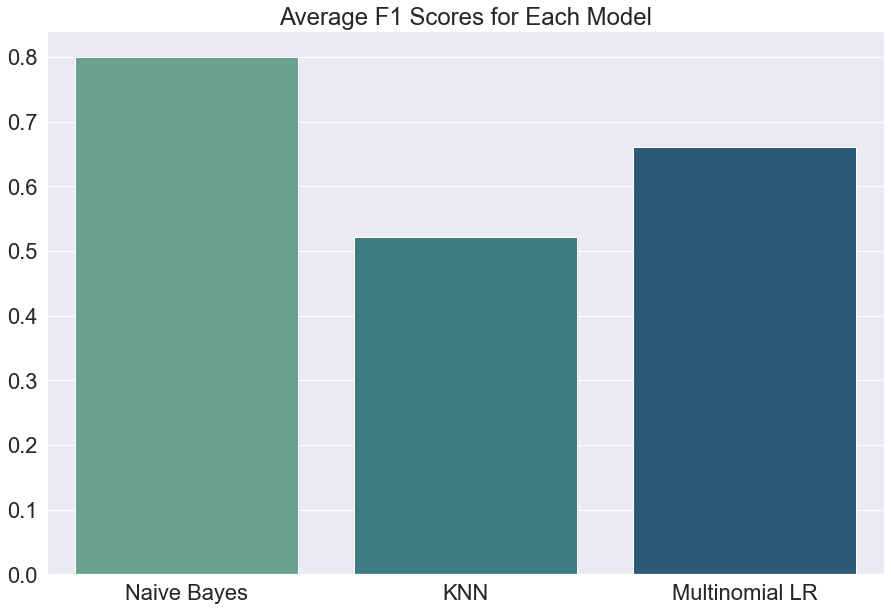

In [28]:
overall_f1 = []
nb_f1 = nb_classification_report['macro avg']['f1-score']
knn_f1 = knn_classification_report['macro avg']['f1-score']
multinomial_f1 = multinomial_classification_report['macro avg']['f1-score']

overall_f1.append([nb_f1])
overall_f1.append([knn_f1])
overall_f1.append([multinomial_f1])

overall_f1_df = pd.DataFrame(overall_f1)
overall_f1_df = overall_f1_df.T
overall_f1_df.columns = label_list
sns.barplot(overall_f1_df, palette='crest', errorbar=None).set(title="Average F1 Scores for Each Model")

## Accuracy

[Text(0.5, 1.0, 'Resulting Accuracy for Each Model')]

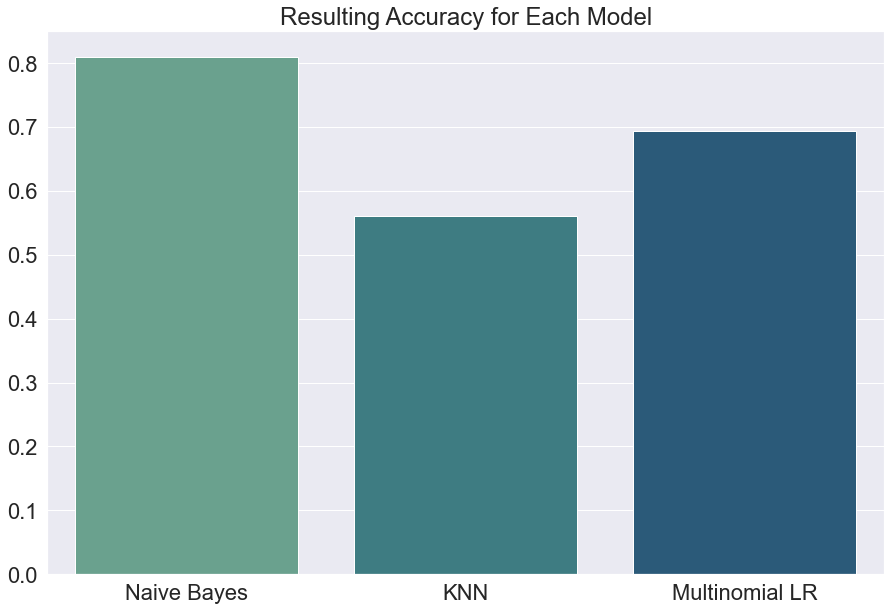

In [29]:
accuracy_nb = []
accuracy_knn = []
accuracy_multinomial = []
accuracy_list = []

accuracy_nb.append(nb_classification_report['accuracy'])
accuracy_knn.append(knn_classification_report['accuracy'])
accuracy_multinomial.append(multinomial_classification_report['accuracy'])

accuracy_list.append(accuracy_nb)
accuracy_list.append(accuracy_knn)
accuracy_list.append(accuracy_multinomial)

accuracy_df = pd.DataFrame(accuracy_list)
accuracy_df = accuracy_df.T
accuracy_df.columns = label_list
sns.barplot(accuracy_df, palette="crest", errorbar=None).set(title='Resulting Accuracy for Each Model')